In [47]:
from fp2graph import *
from shapely import Polygon
import skimage.measure as meas
from sklearn.cluster import KMeans
import plotly.express as px
import re

In [3]:
PATH = 'plans/fp_ostwald11_f3_2.png'
f = FloorPlan2Graph(PATH)

<module 'matplotlib.pyplot' from '/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

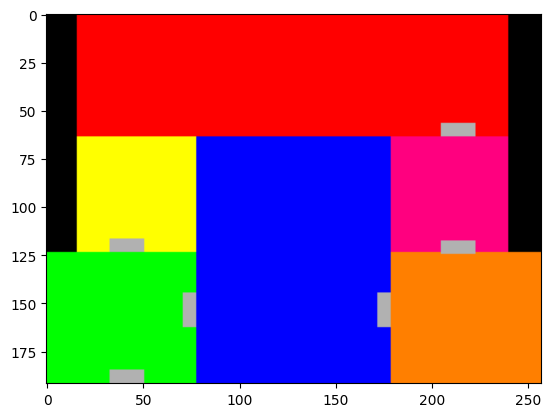

In [4]:
f.image2tensor()
f.view_plan_image()

<module 'matplotlib.pyplot' from '/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

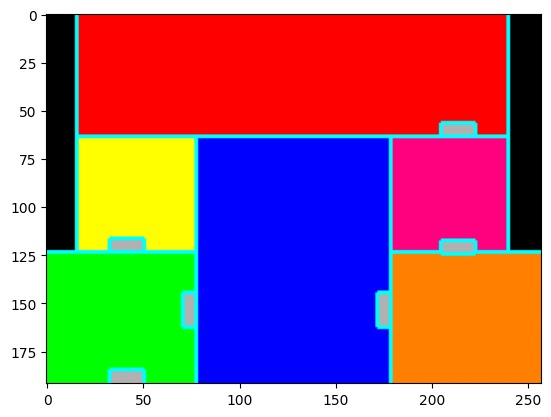

In [5]:
f.segment_tensor()
f.view_plan_segments()

In [6]:
f.tensor_labels

array([[8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       ...,
       [6, 6, 6, ..., 5, 5, 5],
       [6, 6, 6, ..., 5, 5, 5],
       [6, 6, 6, ..., 5, 5, 5]], dtype=int8)

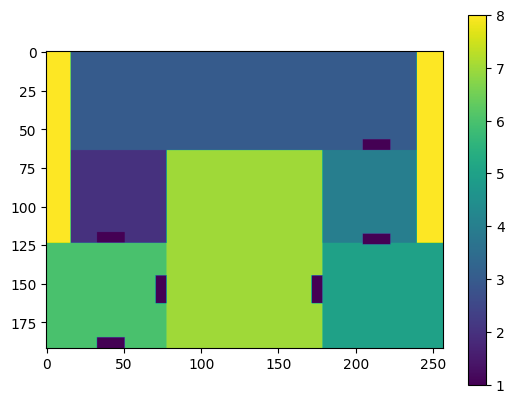

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(f.tensor_labels)
cbar = ax.figure.colorbar(im, )
# plt.bar_label()

In [8]:
f.segment_tensor()
df = f.df
# df["Index"] = df.index

df["X Pos"] = np.indices(f.tensor.shape[0:2])[0].reshape(-1)
df["Y Pos"] = np.indices(f.tensor.shape[0:2])[1].reshape(-1)

df

,R,G,B,Label,X Pos,Y Pos
0,0,0,0,8,0,0
1,0,0,0,8,0,1
2,0,0,0,8,0,2
3,0,0,0,8,0,3
4,0,0,0,8,0,4
...,...,...,...,...,...,...
49339,255,127,0,5,191,252
49340,255,127,0,5,191,253
49341,255,127,0,5,191,254
49342,255,127,0,5,191,255


In [9]:
mask = (df['R'] == 0 ) & (df["G"] == 0) & (df["B"] == 0)

for ix, row in df.iterrows():
    if ix in df.loc[mask].index:
        df.at[ix, "Label"] = int(1000)


In [10]:
df

,R,G,B,Label,X Pos,Y Pos
0,0,0,0,-24,0,0
1,0,0,0,-24,0,1
2,0,0,0,-24,0,2
3,0,0,0,-24,0,3
4,0,0,0,-24,0,4
...,...,...,...,...,...,...
49339,255,127,0,5,191,252
49340,255,127,0,5,191,253
49341,255,127,0,5,191,254
49342,255,127,0,5,191,255


In [11]:
tensor_labels = np.array(df["Label"]).reshape(f.tensor_shape[:2])
tensor_labels

array([[-24, -24, -24, ..., -24, -24, -24],
       [-24, -24, -24, ..., -24, -24, -24],
       [-24, -24, -24, ..., -24, -24, -24],
       ...,
       [  6,   6,   6, ...,   5,   5,   5],
       [  6,   6,   6, ...,   5,   5,   5],
       [  6,   6,   6, ...,   5,   5,   5]], dtype=int8)

In [12]:
np.unique(tensor_labels)

array([-24,   1,   2,   3,   4,   5,   6,   7], dtype=int8)

In [13]:
props = meas.regionprops(tensor_labels, f.tensor)
props

## splitting doors

/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


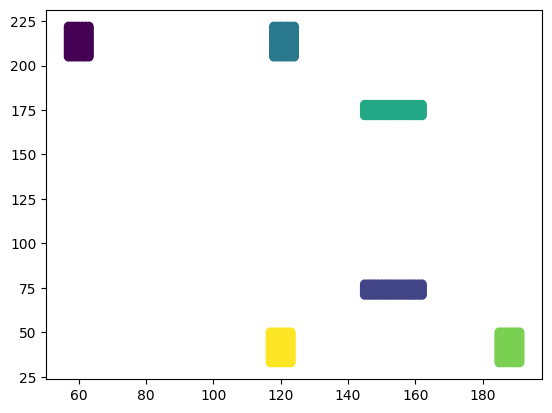

In [14]:
indices_split = np.where(f.tensor_labels == 1)
indices = np.argwhere(f.tensor_labels == 1)
# TODO make this so dont have to get init clusers
kmeans = KMeans(n_clusters=6)
y_pred = kmeans.fit_predict(indices)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(indices_split[0], indices_split[1], c=y_pred)

In [15]:
new_tensor_labels = f.tensor_labels.copy()

for x, y, door_label in zip(indices_split[0], indices_split[1], y_pred):
    new_tensor_labels[x,y] = 10+door_label # TODO make a higher number, like 100... based on number of expected rooms..

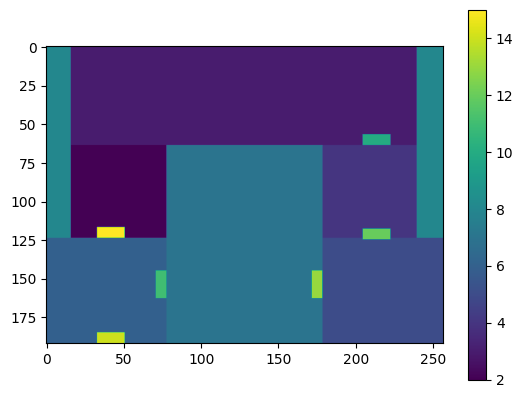

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(new_tensor_labels)
cbar = ax.figure.colorbar(im, )

In [17]:
props = meas.regionprops(new_tensor_labels, f.tensor)

[(16, 64), (78, 64), (78, 124), (16, 124)]

In [48]:
def rgb_str_to_rgba(rgb_str):
    # Extract numeric values from the string using regular expression
    rgb_values = [int(value) for value in re.findall(r'\d+', rgb_str)]
    
    # Convert to RGBA format
    rgba_values = [value / 255 for value in rgb_values] + [1.0]  # Normalize RGB values to the range [0, 1]
    
    return tuple(rgba_values)

In [49]:
rgb_str_to_rgba(colors[0])

(0.18823529411764706, 0.07058823529411765, 0.23137254901960785, 1.0)

In [59]:
meas._regionprops.RegionProperties?

Init signature:
meas._regionprops.RegionProperties(
    slice,
    label,
    label_image,
    intensity_image,
    cache_active,
    *,
    extra_properties=None,
    spacing=None,
    offset=None,
)
Docstring:     
Please refer to `skimage.measure.regionprops` for more information
on the available region properties.
File:           ~/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/skimage/measure/_regionprops.py
Type:           type
Subclasses:     


In [60]:
props[0].bbox_area

3720.0

0 {(255, 255, 0), (0, 0, 0)} 3720.0
1 {(0, 0, 0), (255, 0, 0)} 14336.0
2 {(255, 0, 127), (0, 0, 0)} 3660.0
3 {(255, 127, 0), (0, 0, 0)} 5304.0
4 {(0, 255, 0), (0, 0, 0)} 5304.0
5 {(0, 0, 0), (0, 0, 255)} 12928.0
6 {(0, 0, 0)} 31868.0
7 {(177, 177, 177)} 126.0
8 {(177, 177, 177)} 126.0
9 {(177, 177, 177)} 126.0
10 {(177, 177, 177)} 126.0
11 {(177, 177, 177)} 126.0
12 {(177, 177, 177)} 126.0


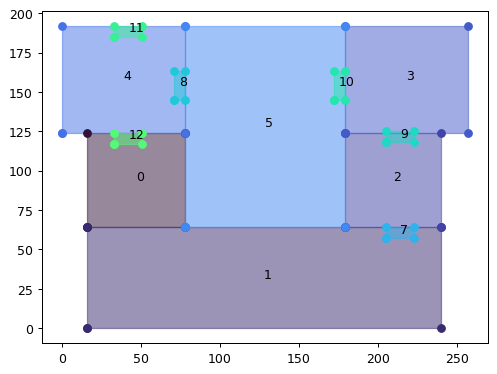

In [63]:
fig = plt.figure(  dpi=90)
ax = fig.add_subplot(111)  

n_colors = 30

colors = px.colors.sample_colorscale("turbo", [n/(n_colors -1) for n in range(n_colors)])
good_colors = [rgb_str_to_rgba(r) for r in colors]

for ix, prop in enumerate(props):
    int0 = prop.image_intensity
    s = int0.shape
    int01 = np.reshape(int0, (s[0] * s[1], 3))
    unique_tuples = {tuple(arr) for arr in int01}

    coords = create_coords(Bbox(prop.bbox))
    shape = Polygon(coords)
    centroid = (shape.centroid.x, shape.centroid.y)
    area = prop.bbox_area
    print(ix, unique_tuples, area)

    if ix != 6: 
        splt.plot_polygon(shape, ax=ax, alpha=0.5, color=good_colors[ix])
        ax.annotate(str(ix), centroid)
    

# test 

In [18]:
len(f.regions)

AttributeError: 'FloorPlan2Graph' object has no attribute 'regions'

In [ ]:
# dont want to plot regions with label 8 or 1 with shapely 
all_region_props = meas.regionprops(f.tensor_labels, f.tensor)
all_region_props

In [ ]:
f.regions = f.regions[1:7]

In [ ]:
f.regions

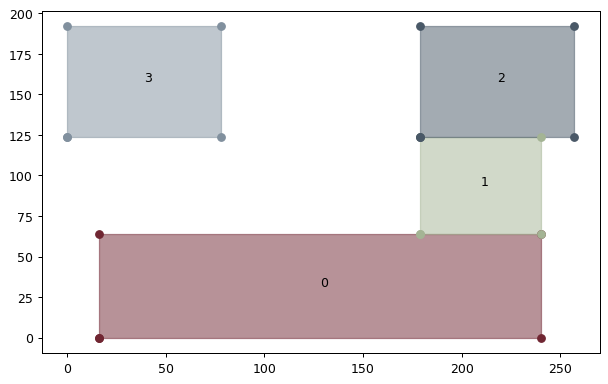

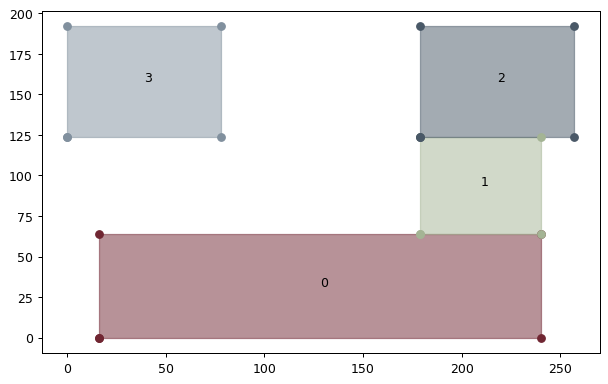

In [ ]:
f.view_plan_shapely()

In [ ]:
# based on image_intensity prop (has to update meas.region_props to recive unlabeled image), can see that 0 and 7 are the regions of interest. with 0 being the doors. although can search after the fact, can also consider dictionary, or including the values in 
all_region_props[7].image_intensity

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
all_region_props[0]?

Type:        RegionProperties
String form: <skimage.measure._regionprops.RegionProperties object at 0x122791a60>
File:        ~/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/skimage/measure/_regionprops.py
Docstring:  
Please refer to `skimage.measure.regionprops` for more information
on the available region properties.


IndexError: list index out of range

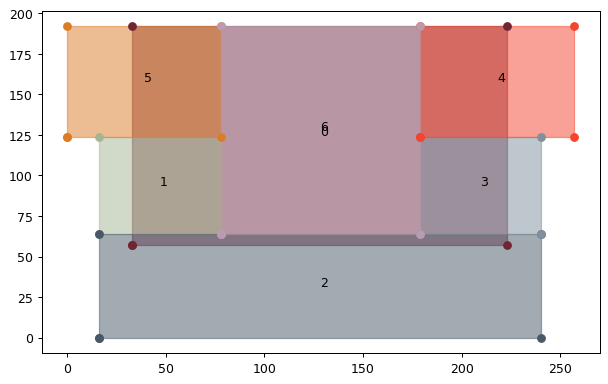

In [ ]:
f.array2shapely()
_ = f.view_plan_shapely()